<a href="https://colab.research.google.com/github/Hetvi07/Weather_Prediction/blob/main/Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
    import torchbearer
except:
    !pip install -q torchbearer
    import torchbearer

!pip install livelossplot
print(torchbearer.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.1/138.1 KB 6.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0.5.3


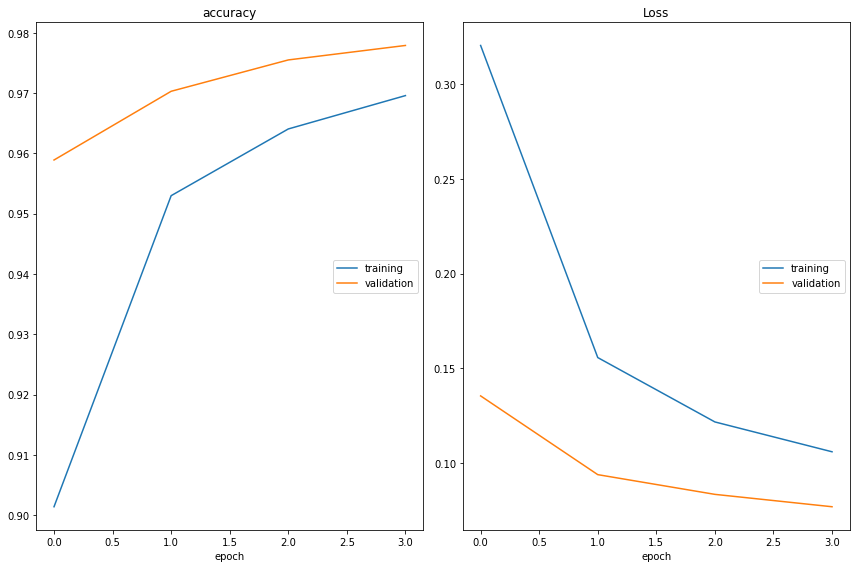

accuracy
	training         	 (min:    0.901, max:    0.970, cur:    0.970)
	validation       	 (min:    0.959, max:    0.978, cur:    0.978)
Loss
	training         	 (min:    0.106, max:    0.321, cur:    0.106)
	validation       	 (min:    0.077, max:    0.135, cur:    0.077)
469/469 [==============================] - 8s 18ms/step - loss: 0.1059 - accuracy: 0.9696 - val_loss: 0.0768 - val_accuracy: 0.9779
Epoch 5/10
 62/469 [==>...........................] - ETA: 5s - loss: 0.0922 - accuracy: 0.9703

In [ ]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)


"""Load and prepare data"""

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)


"""Build and train neural network"""

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


"""Summarize and visualize the model"""

# Summary of neural network
model.summary()

# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))